<a href="https://colab.research.google.com/github/nutyfreshz/MADT8101_Customer_Analytics/blob/main/EP_9_10_Customer_segmentation_%26_Movement_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation**

## **What is customer segmentation**

Customer segmentation is a data science and marketing technique to group customers based on shared characteristics and behaviors. It helps businesses tailor strategies to meet specific customer needs and enhance satisfaction and loyalty.

## **Customer Segmentation VS Clustering**

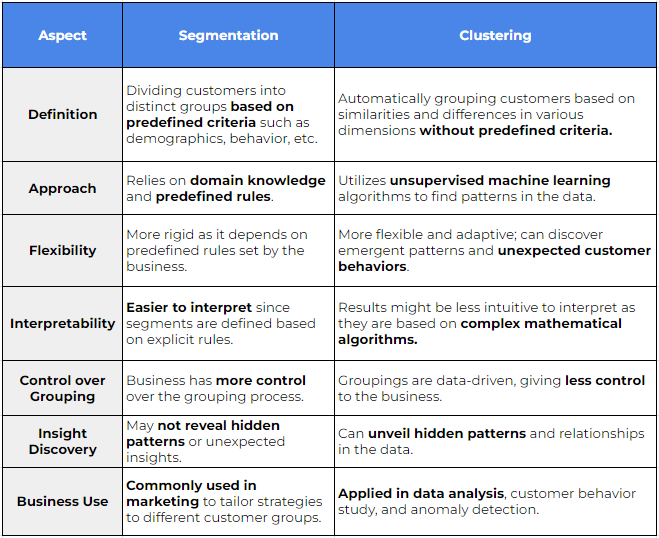


## **When should you use the Segmentation and Clustering technique?**

* **Customer Segmentation suitable for**:

 * **Clear Business Goals**: Predefined segments creation based on known criteria for targeting specific customer groups with well-defined business goals.

 * **Actionable Insights**: Need actionable insights to develop personalized marketing strategies, customer segmentation is a better choice. Cleary understanding the distinct needs, preferences, and behaviors of different customer groups.

 * **Predefined Criteria**: Efficiently categorizes customers based on predefined criteria if relevant features or attributes are already available.

 * **Interpretability**: Suitable for business decision-making when interpretability is crucial, as it creates groups using explicit rules.


* **Customer Clustering suitable for**:

 * **Unknown Patterns**: Clustering reveals hidden structures and relationships in customer data, aiding in identifying natural groupings and discovering unknown patterns.

 * **Data-Driven Grouping**: Suitable when predefined criteria are absent, or a data-driven method is needed to group customers based on intrinsic similarities.

 * **Exploratory Analysis**: Clustering helps explore data and understand underlying structures.

 * **Flexibility**: Flexible and adaptive approach to address changing customer behavior and capture evolving trends.

In conclusion, an organization's readiness for data-driven techniques depends on its data culture, accessibility, analytical skills, willingness to change, decision-making processes, experimentation, leadership support, and commitment to data privacy and ethics.

## **Popular Algorithm for Clustering (For segmentation)**

* **Nurmerical features**

  * K-Means
  * K-Median

* **Caategorical features**
  * K-Modes

* **Mixed features**
  * K-Mediod
  * K-Prototype

### **Numerical features**

#### **K-Means Algorithm**

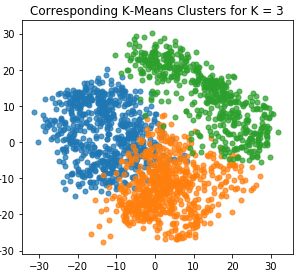

* **Pros:**

 1. **Simplicity**: Easy to implement and understand.

 2. **Efficiency**: Handle large datasets efficiently, scalable to large data points.

 3. **Speed**: The algorithm is computationally efficient suitable for real-time or iterative applications.

 4. **Applicability**: Works well when clusters are relatively well-separated.


* **Cons**:

 1. **Sensitivity to Initialization**: The algorithm's final result can be influenced by the **initial placement of centroids**, leading to different solutions.

 2. **Fixed Number of Clusters**: K-means requires the number of clusters (k) to be specified beforehand, **which might not always be known in real-world scenarios**.

 3. **Outliers Impact**: K-means is **sensitive to outliers**, and a single outlier can significantly affect the clustering results.

 4. **Scaling Sensitivity**: The algorithm's effectiveness can be affected by the scale of the features, and **data normalization might be necessary**.





In [ ]:
# import libs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
X = df_clustering[df_clustering.columns.to_list()]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X = X_scaled

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Check optimized number of centriods**

* **Elbow Method**

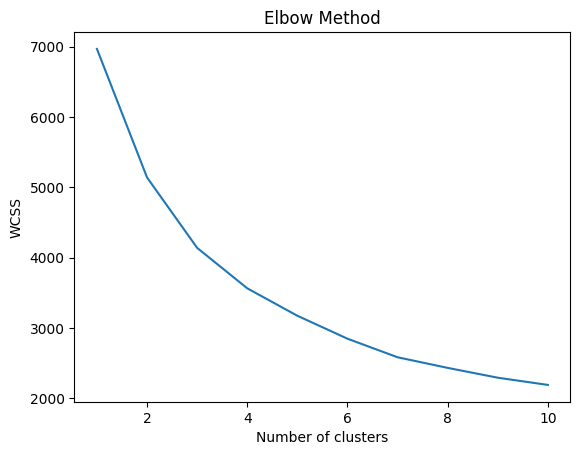

* **Silhouette Medthod**

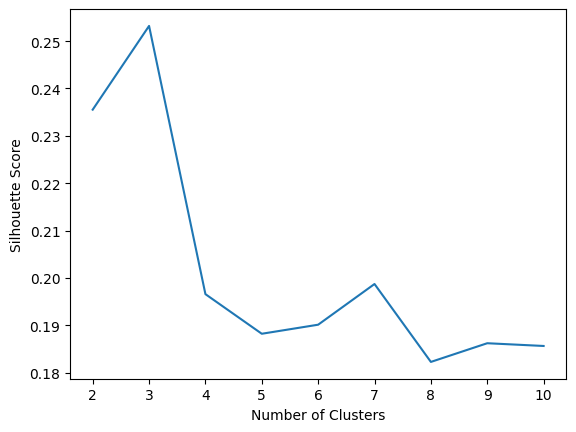

In this case, we select 3 clusters for this dataset due to Elboew point stabilize at 3 and Silhoulete score was spike up on this number too.

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=6969)
kmeans.fit(X)

clusters = kmeans.predict(X)

df_clustering['cluster'] = clusters

#### **K-Median Algorithm**

Intead of using mean (average) of the data points within each cluster as the new centroid, the K-Median algorithm uses the median value of the data points.

* **Pros:**
 1. **Robustness to Outliers**: **More robust to outliers** compared to K-Means, as it uses the median (L1 distance) instead of the mean (L2 distance) to calculate cluster centroids.

 2. **Clustering Compactness**: Create more compact clusters, making it suitable for certain types of datasets with **irregular cluster shapes**.

 3. **Interpretable Centroids**: The centroids in K-Median represent actual data points, making them more interpretable and meaningful in some scenarios.

* **Cons:**

 1. **Higher Computational Complexity**: Calculating the median (L1 distance) is computationally more complex than the mean (L2 distance), which can lead to **higher computational costs**.

 2. **Sensitivity to Initialization**: Sensitive to the initial placement of centroids, affecting the final clustering outcome.

 3. **Fixed Number of Clusters (K)**: The number of clusters (K) needs to be predetermined, which might not be known in advance for real-world datasets.


### **Categorical features**


#### **K-Modes Algorithm**

* **Pros:**

 1. **Categorical Data Handling:** Designed for clustering categorical feature datasets when traditional distance metrics are not applicable.

 2. **Interpretable Centroids:** The centroids in K-Modes represent actual categories from the dataset, enhancing interpretability for categorical data analysis.

 3. **Robustness to Outliers:** K-Modes is robust to outliers due to its use of mode-based distance for categorical variables.

* **Cons:**

 1. **Higher Computational Complexity:** The mode-based distance for categorical variables is more computationally demanding than traditional metrics for continuous data, resulting in higher computational costs.

 2. **Sensitivity to Initialization:** The initial centroid placement in K-Modes can impact the clustering outcome, similar to K-Means.

 3. Scalability for Large Datasets: K-Modes may encounter challenges in scaling to large datasets with many categorical features due to computational complexity.

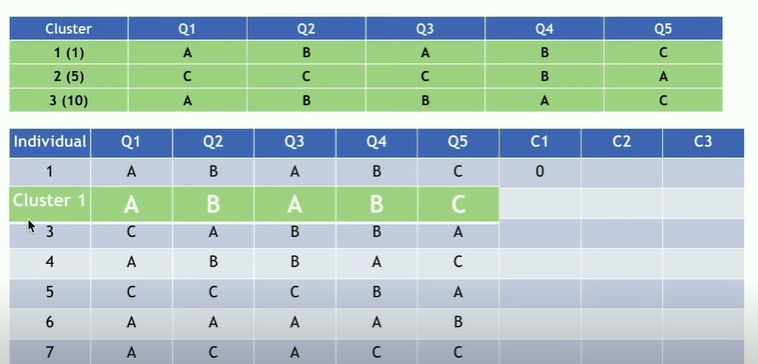

1. Random Leader of each Cluster, from this example we will pick individual 1,5,10 as leader of cluster 1,2,3 accordingly.

2. Pick up leader of each cluster and compare each individual, if value was diffent +1

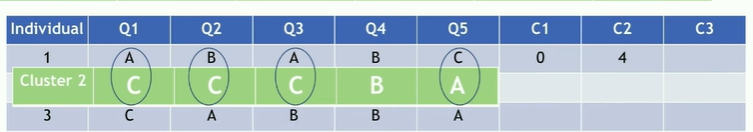

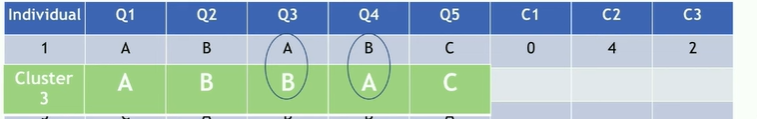

Repeat to another individual on loop.

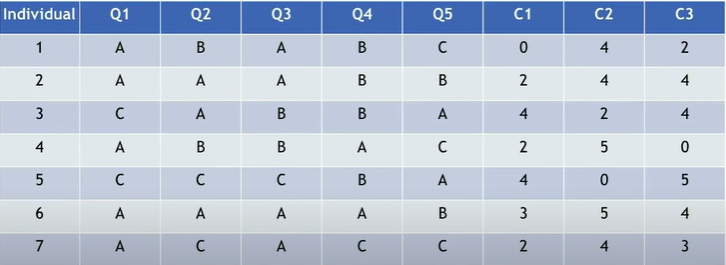

### **Mixed features**

##### K-Mediod

* **K-medoids** is a clustering algorithm similar to K-means. It creates groups in data based on distances and is suitable for mixed-type data.

 * **The Gower's distance** computes dissimilarities on a [0 1] range for both numerical and categorical inputs, making them comparable.

    * The metrics used for each data
type are described below:

    1. **quantitative (interval)**: range-normalized Manhattan distance.
    
    2. **ordinal**: variable is first ranked, then Manhattan distance is used with a special adjustment for ties

    3. **nominal**: variables of k categories are first converted into k binary columns and then the **Dice coefficient** is used.



**Code for K-Mediods**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

def find_optimal_clusters(data, max_clusters):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmedoids = KMedoids(n_clusters=i, metric='euclidean', random_state=42)
        kmedoids.fit(data)
        wcss.append(kmedoids.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.title('Elbow Method to Find Optimal Clusters')
    plt.show()


def find_optimal_clusters_silhouette(data, max_clusters):
    silhouette_scores = []
    for i in range(2, max_clusters + 1):
        kmedoids = KMedoids(n_clusters=i, metric='euclidean', random_state=42)
        kmedoids.fit(data)
        labels = kmedoids.labels_
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)

    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score to Find Optimal Clusters')
    plt.show()


kmedoids = KMedoids(n_clusters=optimal_clusters, metric='euclidean', random_state=42)
kmedoids.fit(data)
cluster_labels = kmedoids.labels_

## **Clustering implementation**

Using Classification model with SHAP value to identify outstanding features for each cluster.

### **What is SHAP value**

* The SHAP value is a method for explaining machine learning model outputs. It applies to various models and helps understand feature contributions to predictions.

* Example of models that can use SHAP values function
  1. **Linear Models**: These are simple models where the relationship between features and the target variable is represented as a linear combination of feature values.

  2. **Tree-Based Models**: Decision trees, Random Forests, Gradient Boosting Machines (GBMs), and XGBoost are examples of tree-based models. Tree-based models are well-suited for SHAP values because they naturally partition the feature space.

  3. **Support Vector Machines (SVM)**: SVM is a popular model for classification and regression tasks.



### **Code for Classification and SHAP technique**

In [ ]:
import xgboost as xgb
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
X = df_clustering.drop('cluster', axis=1)
y = df_clustering['cluster'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = xgb.XGBClassifier(objective='multi:softmax', random_state=42)
model.fit(X_train_scaled, y_train)

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test_scaled)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

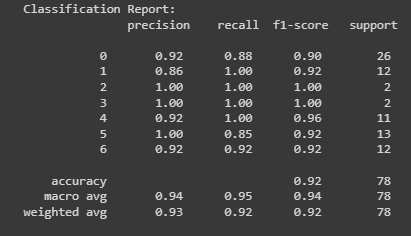

The classification model is learning patterns from the data effectively.

**Explain features with SHAP each cluster**

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test_scaled)

for i in range(model.classes_.shape[0]):
    class_name = model.classes_[i]
    print('CLUSTER: ',class_name)
    shap.summary_plot(shap_values[:, :, i], X_test)
    print('#######################')

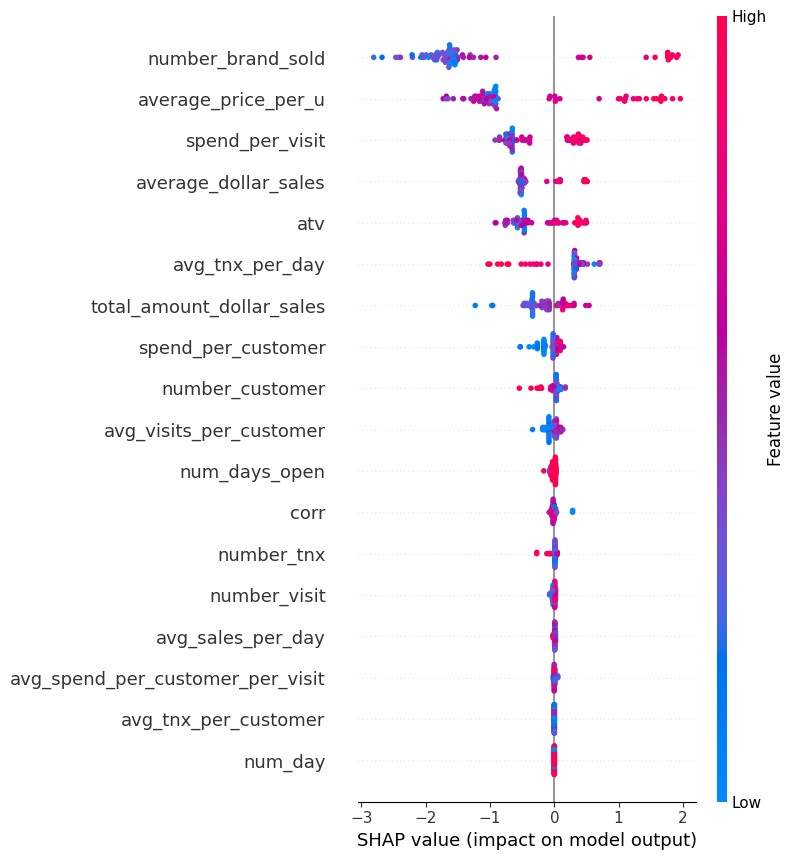

Example of Cluster 4, This cluster have high number of brand sold and average price per units also high and etc.

"Cluster 4 represents premium products in a niche or high-end market with established brands competing based on reputation, product excellence, and customer preferences."

# **Segment Movement Analysis**

Segment Movement Analysis is a technique that tracking and analyzing the movement of individuals or groups across different segments over a specific period.

## Segment Movement SQL basics code.

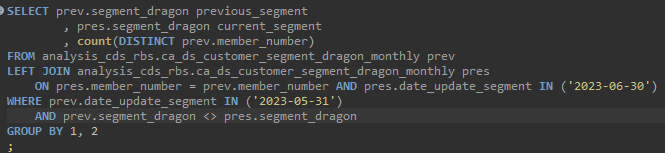

**Data model before visualize with Sankey chart.**

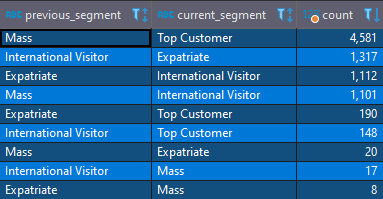

**Segment movement with Sankey chart**

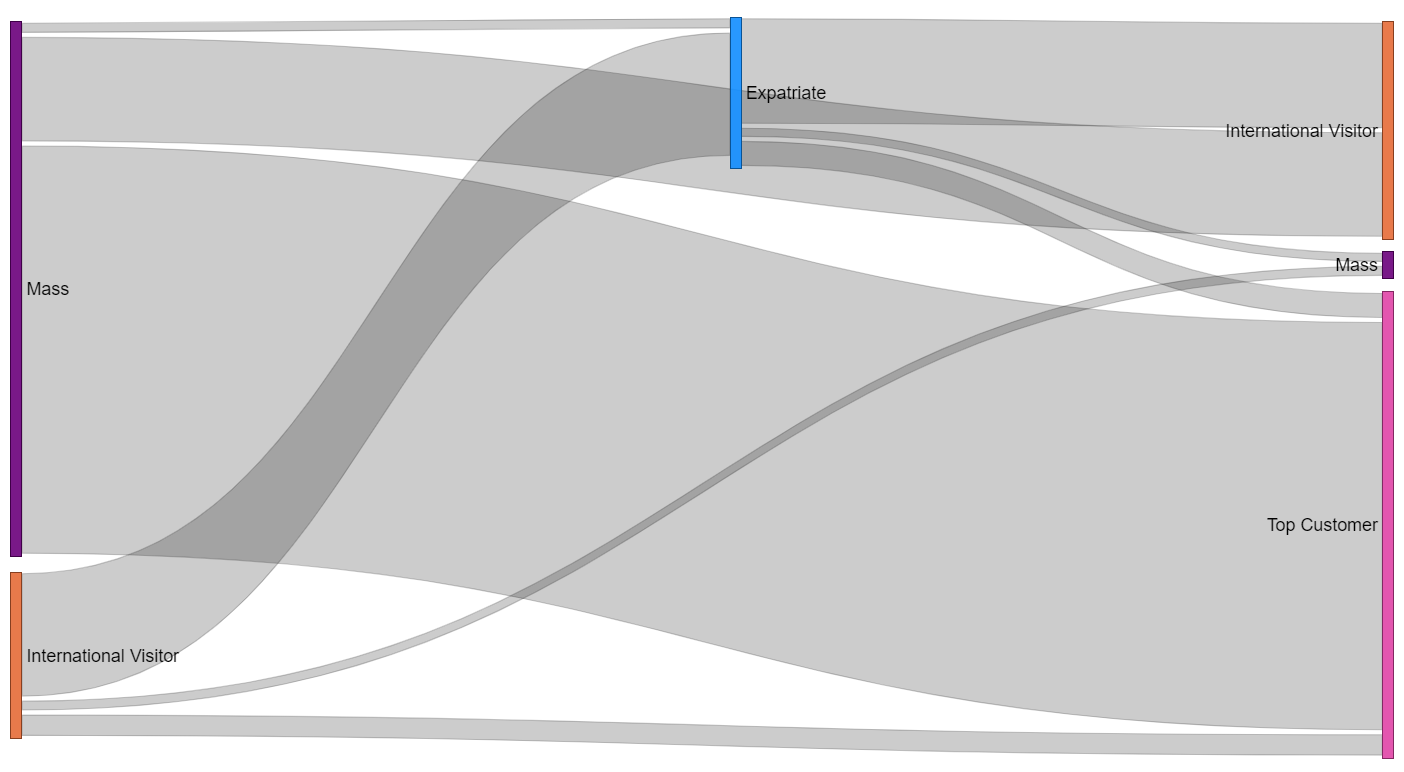

The business objective in the provided example is to elevate customers from the "Mass" segment (less premium) to the "Top Customer" segment (more premium) over time. The goal is to identify potential high-value customers and encourage more customers to transition from the "Mass" segment to the "Top Customer" segment in subsequent periods. This is achieved through data-driven strategies, such as targeted marketing campaigns, loyalty programs, personalized offers, and improved customer experiences.